# Teaching a Machine How to Multiply

### Context

The original goal for this notebook was to find whether we can train our machine how to multiply - pretty similar to what we did with [addition](https://github.com/sttaseen/DL-doodles/blob/main/Teaching%20a%20Machine%20How%20To%20Add.ipynb). Check that out before, if you haven't already.

While addition was pretty straight forward, doing multiplication has some caveats which we will see as we progess with this doodle.

### Plan

The plan for our training is very similar to our addition model, so you can skip this if you want. Regardless, the steps are as follows:

* Make an **n** X 2 dataframe and fill it with random integers going from 0 to **m**, where **m** is the maximum number that a number can be.
* Add another column that will have the product of the two columns. This will be our results column.
* *Use log normalisation on the data.* *
* Make an NN (Neural Network) and train it on test data.
* Use the NN model and make it predict the test data.
* Plot a graph with the predictions and actual outcomes to see how well the model works.

And at the end, we can give it two numbers and check what it thinks the product should be.

*Things don't always go as planned. This step was added later. Don't worry too much about it. I will discuss it later.* *

### Imports

Let's begin by importing some libraries.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Make the Data

Now, let's make up the dataset.

In [4]:
n = 10000 # number of calculations
m = 100 # maximum number for the random number generator (RNG).
df = pd.DataFrame(np.random.randint(1,m,size=(n, 2)), columns=['first', 'second'])
df['product'] = df['first']*df['second']

In [5]:
df.head()

,first,second,product
0,97,67,6499
1,22,7,154
2,13,59,767
3,73,85,6205
4,65,47,3055


### Exploratory Data Analysis (EDA)

This is just to see if we can see any correlation between the product and the inputs that the computer can look for. 

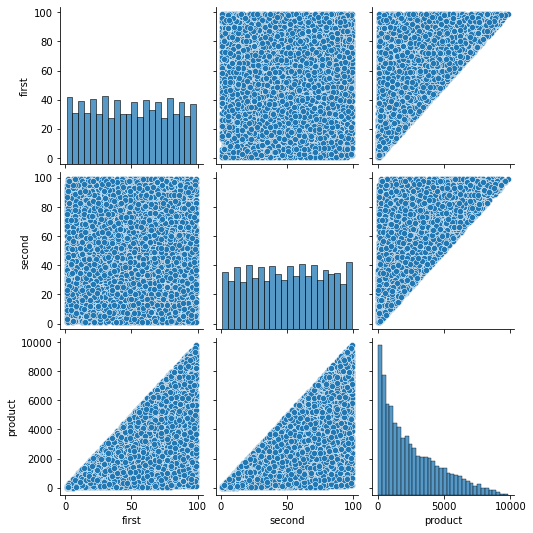

In [7]:
sns.pairplot(data=df)

As expected, we can see a uniform distribution of the first and second values from the RNG. It is interesting that the product is skewed to the left meaning we have more values that are larger than those that are not.

### Model Selection

Now, let's split the whole dataset into two sets: one for training and the other for testing. Later on, we will use this to see how good our model performs

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('product', axis=1), df['product'], test_size=0.33, random_state=42)

### Training

Here, we will set the neural network and train the data on the training set. We will be using tensorflow for this. Dense here is a layer of neurons with the parameter being the number of neurons in that layer. For our loss function, we will be using mean square error to check how close the prediction is to the actual sum and for our optimiser, let's use rmsprop.

Note: I have tried different parameters but still the results are the same.

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

# Now then, let's start training.

model.fit(x=X_train, y=y_train, epochs=10, verbose=1)

# Don't worry about the high loss values. It's not you, it's the algorithm.

Epoch 1/10
210/210 [==============================] - 0s 757us/step - loss: 10544303.0000
Epoch 2/10
210/210 [==============================] - 0s 616us/step - loss: 8744506.0000
Epoch 3/10
210/210 [==============================] - 0s 559us/step - loss: 5076560.5000
Epoch 4/10
210/210 [==============================] - 0s 553us/step - loss: 1979912.0000
Epoch 5/10
210/210 [==============================] - 0s 598us/step - loss: 1482418.0000
Epoch 6/10
210/210 [==============================] - 0s 571us/step - loss: 1303390.7500
Epoch 7/10
210/210 [==============================] - 0s 561us/step - loss: 1093147.2500
Epoch 8/10
210/210 [==============================] - 0s 564us/step - loss: 861542.5625
Epoch 9/10
210/210 [==============================] - 0s 554us/step - loss: 623853.9375
Epoch 10/10
210/210 [==============================] - 0s 592us/step - loss: 406094.0000


### Analysis

No matter what we do, it never seems to decrease the loss significantly enough. At first, I thought maybe we needed to increase the number of epochs or neurons. As a result, I kept on changing the parameters hoping something would happen but it seems deep learning isn't all magic. 

Honestly, I was a bit disappointed after understanding why this was happening. Nothing good comes without some caveats.

If we look behind the hood, we know that the neurons are working like a function, sum(ax+b) where a are the weights, x are the previous inputs and b are biases. No matter what you do, you can't make a feed-forward NN with these to make it do multiplication of two different input numbers. 

### Solution

After doing some research online, I found this on [stack exchange](https://stats.stackexchange.com/questions/217703/can-deep-neural-network-approximate-multiplication-function-without-normalizatio). A clever way to solve this is to use log normalisation.

In other words, 

if
   **m = x ⋅ y
⇒ lg(m) = lg(x) + lg(y)**

This means we can just train our neural network to just do addition again and then use exponent to find the product. While this does seem like a cheat, I couldn't find any other way to bypass this. Please contact me if there is a way that I don't know of. I do know that there is tensorflow.keras.layers.Multiply that multiplies inputs instead of adding but that also seems like cheating as we need to know that what we are doing is *in fact* multiplication.

### Implementation

Let's begin by normalising the inputs.

In [69]:
# We will be using base-2 but any base should work

df[['log first', 'log second', 'log product']] = np.log2(df[['first', 'second', 'product']])
X_train_scaled = df[['log first', 'log second']]
y = df['log product']
df.head()

,first,second,product,log first,log second,log product
0,97,67,6499,6.599913,6.066089,12.666002
1,22,7,154,4.459432,2.807355,7.266787
2,13,59,767,3.700440,5.882643,9.583083
3,73,85,6205,6.189825,6.409391,12.599215
4,65,47,3055,6.022368,5.554589,11.576957


### New EDA

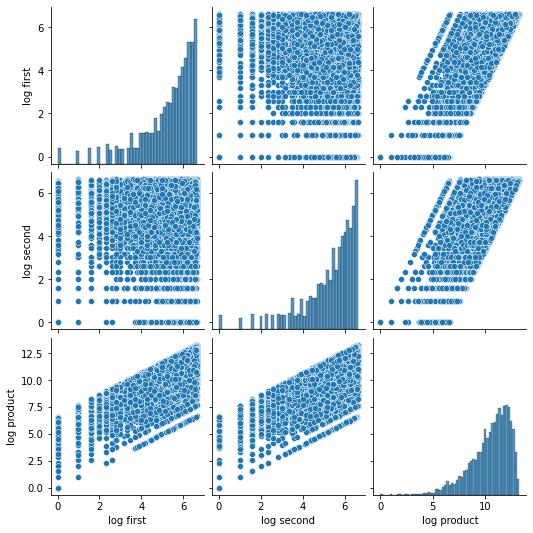

In [42]:
sns.pairplot(data=df[['log first', 'log second', 'log product']])

This looks awfully similar to the ones we saw when we did addition. 

### Training Again

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.33, random_state=42)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()
model.add(Dense(1, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [50]:
model.fit(x=X_train, y=y_train, epochs=10, verbose=1)

Epoch 1/10
210/210 [==============================] - 0s 647us/step - loss: 0.9869
Epoch 2/10
210/210 [==============================] - 0s 548us/step - loss: 0.0093
Epoch 3/10
210/210 [==============================] - 0s 526us/step - loss: 3.3886e-04
Epoch 4/10
210/210 [==============================] - 0s 544us/step - loss: 1.7126e-04
Epoch 5/10
210/210 [==============================] - 0s 580us/step - loss: 1.4475e-04
Epoch 6/10
210/210 [==============================] - 0s 553us/step - loss: 1.4115e-04
Epoch 7/10
210/210 [==============================] - 0s 529us/step - loss: 1.3887e-04
Epoch 8/10
210/210 [==============================] - 0s 543us/step - loss: 1.3977e-04
Epoch 9/10
210/210 [==============================] - 0s 564us/step - loss: 1.3944e-04
Epoch 10/10
210/210 [==============================] - 0s 552us/step - loss: 1.3979e-04


The loss seems to be very low, this is even lower than what we got for doing addition. This might be due to our lower m or because of the log. My bet's on the lower m.

<AxesSubplot:>

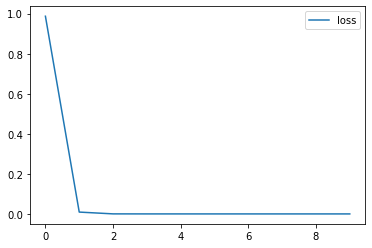

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation

Let's do some evalutaions to see how good our models are.

In [52]:
test_predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
mean_absolute_error(y_test, test_predictions)

0.010170926136324676

In [55]:
mean_squared_error(y_test, test_predictions)

0.00010698393865972315

So far, it looks like they are pretty good. Do note that we haven't taken into account the log but it shouldn't be a problem since the results that the metrics are comparing to are also log-ed.

### Some Testing

Now, let's test our model and see how good it is at multiplying.

In [56]:
2**model.predict(np.log2(pd.DataFrame({'first':[5],'second':[3]})))[0][0]

14.962029806779553

Not so bad, right?

### Conclusion

Feel free to change the values and see what it predicts the product to be. So far, this project has been a success, albeit we did use a *cheat*. I know people don't use deep learning for basic things like multiplication but still, hopefully, we learned something from here. I, personally now know some of the limits of deep learning. But still, there is so much potential that I can't be nitpicking with something silly like this. I am excited. I can't wait to get my hands on some actual applications of deep learning. 

In [68]:
from tensorflow.keras.models import load_model

In [58]:
model.save('NN_Multiplication_1000_100_1_1.h5')